In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import k_diffusion as K
import numpy as np

N = 5000

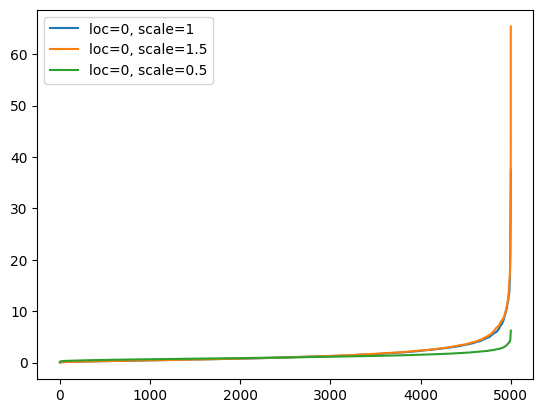

In [3]:
arr = K.utils.rand_log_normal((N,), loc=0, scale=1)
plt.plot(np.arange(N), np.sort(arr), label="loc=0, scale=1")

arr = K.utils.rand_log_normal((N,), loc=0, scale=1)
plt.plot(np.arange(N), np.sort(arr), label="loc=0, scale=1.5")

arr = K.utils.rand_log_normal((N,), loc=0, scale=0.5)
plt.plot(np.arange(N), np.sort(arr), label="loc=0, scale=0.5")

plt.legend()

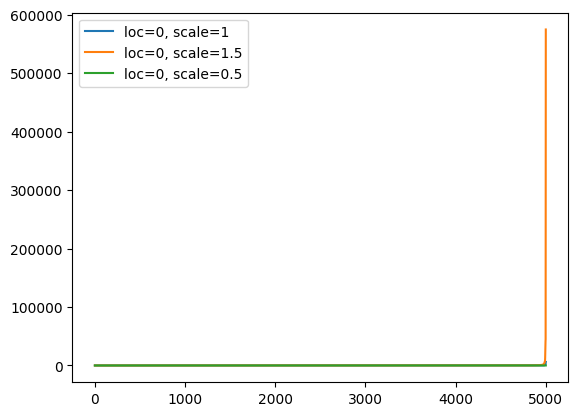

In [4]:
arr = K.utils.rand_log_logistic((N,), loc=0, scale=1)
plt.plot(np.arange(N), np.sort(arr), label="loc=0, scale=1")

arr = K.utils.rand_log_logistic((N,), loc=0, scale=1.5)
plt.plot(np.arange(N), np.sort(arr), label="loc=0, scale=1.5")

arr = K.utils.rand_log_logistic((N,), loc=0, scale=0.5)
plt.plot(np.arange(N), np.sort(arr), label="loc=0, scale=0.5")

plt.legend()

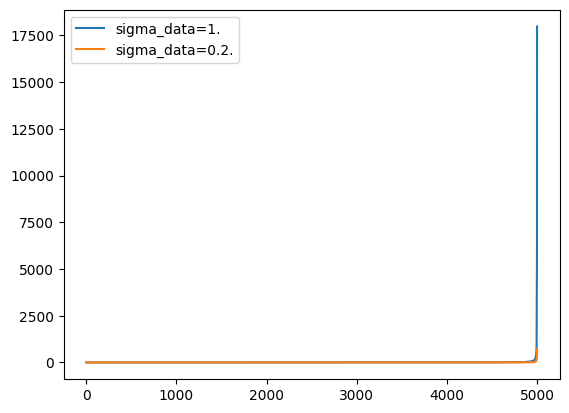

In [5]:
arr = K.utils.rand_v_diffusion((N,), sigma_data=1., min_value=0., max_value=float('inf'), device='cpu').numpy()
plt.plot(np.arange(N), np.sort(arr), label="sigma_data=1.")

arr = K.utils.rand_v_diffusion((N,), sigma_data=0.2, min_value=0., max_value=float('inf'), device='cpu').numpy()
plt.plot(np.arange(N), np.sort(arr), label="sigma_data=0.2.")

plt.legend()

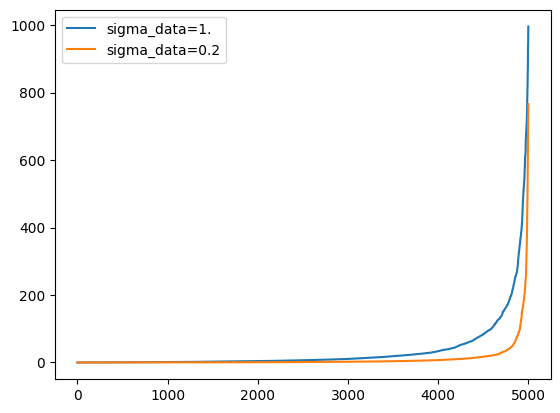

In [6]:
arr = K.utils.rand_cosine_interpolated((N,), image_d=256, noise_d_low=16, noise_d_high=90, sigma_data=1., min_value=1e-3, max_value=1e3).numpy()
plt.plot(np.arange(N), np.sort(arr), label="sigma_data=1.")

arr = K.utils.rand_cosine_interpolated((N,), image_d=256, noise_d_low=16, noise_d_high=90, sigma_data=0.2, min_value=1e-3, max_value=1e3).numpy()
plt.plot(np.arange(N), np.sort(arr), label="sigma_data=0.2")

plt.legend()

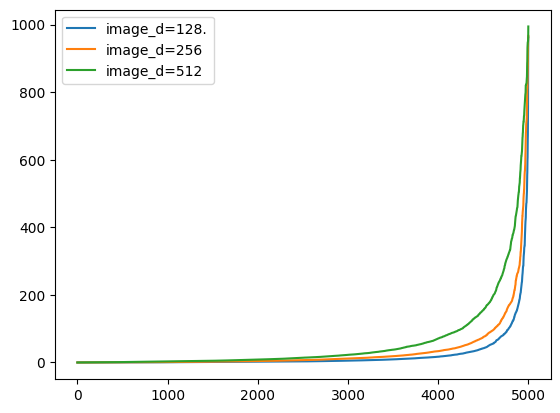

In [7]:
arr = K.utils.rand_cosine_interpolated((N,), image_d=128, noise_d_low=16, noise_d_high=90, sigma_data=1., min_value=1e-3, max_value=1e3).numpy()
plt.plot(np.arange(N), np.sort(arr), label="image_d=128.")

arr = K.utils.rand_cosine_interpolated((N,), image_d=256, noise_d_low=16, noise_d_high=90, sigma_data=1, min_value=1e-3, max_value=1e3).numpy()
plt.plot(np.arange(N), np.sort(arr), label="image_d=256")

arr = K.utils.rand_cosine_interpolated((N,), image_d=512, noise_d_low=16, noise_d_high=90, sigma_data=1, min_value=1e-3, max_value=1e3).numpy()
plt.plot(np.arange(N), np.sort(arr), label="image_d=512")

plt.legend()

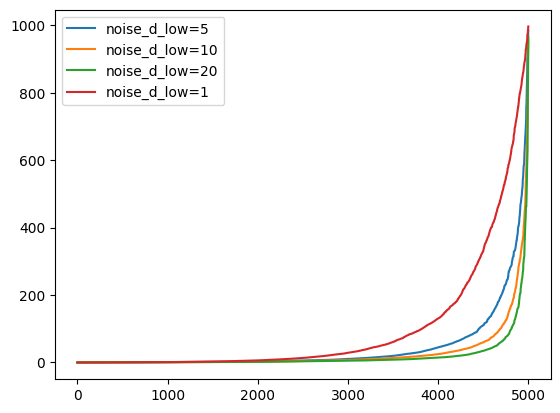

In [8]:
arr = K.utils.rand_cosine_interpolated((N,), image_d=128, noise_d_low=5, noise_d_high=90, sigma_data=1., min_value=1e-3, max_value=1e3).numpy()
plt.plot(np.arange(N), np.sort(arr), label="noise_d_low=5")

arr = K.utils.rand_cosine_interpolated((N,), image_d=128, noise_d_low=10, noise_d_high=90, sigma_data=1, min_value=1e-3, max_value=1e3).numpy()
plt.plot(np.arange(N), np.sort(arr), label="noise_d_low=10")

arr = K.utils.rand_cosine_interpolated((N,), image_d=128, noise_d_low=20, noise_d_high=90, sigma_data=1, min_value=1e-3, max_value=1e3).numpy()
plt.plot(np.arange(N), np.sort(arr), label="noise_d_low=20")

arr = K.utils.rand_cosine_interpolated((N,), image_d=128, noise_d_low=1, noise_d_high=90, sigma_data=1, min_value=1e-3, max_value=1e3).numpy()
plt.plot(np.arange(N), np.sort(arr), label="noise_d_low=1")

plt.legend()

In [9]:
import torch

In [11]:
sigma = K.utils.rand_cosine_interpolated((N,), image_d=128, noise_d_low=128, noise_d_high=1000, sigma_data=1, min_value=1e-3, max_value=5e3)
discretizer = K.external.DiscreteSchedule(sigma, quantize=False)
t = discretizer.sigma_to_t(torch.tensor(sigma))
t

/tmp/ipykernel_3429309/1059868335.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = discretizer.sigma_to_t(torch.tensor(sigma))


tensor([4998.0000, 4937.1660, 4998.0000,  ..., 4998.1553, 4998.0000,
        4999.0000])

In [66]:
def logsnr_schedule_cosine(t, logsnr_min, logsnr_max):
    t_min = math.atan(math.exp(-0.5 * logsnr_max))
    t_max = math.atan(math.exp(-0.5 * logsnr_min))
    return -2 * torch.log(torch.tan(t_min + t * (t_max - t_min)))

def logsnr_schedule_cosine_shifted(t, image_d, noise_d, logsnr_min, logsnr_max):
    shift = 2 * math.log(noise_d / image_d)
    return logsnr_schedule_cosine(t, logsnr_min - shift, logsnr_max - shift) + shift

def logsnr_schedule_cosine_interpolated(t, image_d, noise_d_low, noise_d_high, logsnr_min, logsnr_max):
    logsnr_low = logsnr_schedule_cosine_shifted(t, image_d, noise_d_low, logsnr_min, logsnr_max)
    logsnr_high = logsnr_schedule_cosine_shifted(t, image_d, noise_d_high, logsnr_min, logsnr_max)
    return torch.lerp(logsnr_low, logsnr_high, t)

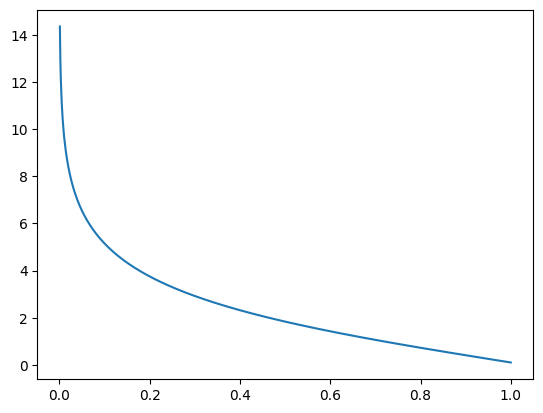

In [84]:
x = torch.linspace(1, 0, 1000).flip(0)
arr = logsnr_schedule_cosine(x, 0.1, 1000)
plt.plot(x, arr)